# TSF Grip - Data Science and Business Analytics Internship

# Intern - Hitesh Pandharkar

## Task 1 - To prediction the marks a student obtains given the number of hours studied every day using Supervised ML.



## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE

import math
import warnings
warnings.filterwarnings('ignore')

## Importing the data using pandas.

In [2]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'

data = pd.read_csv(url)

data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.shape

(25, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Correllation matrix to check the correlation between input and output variable. 

In [5]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Visualizing the data using matplotlib and seaborn.

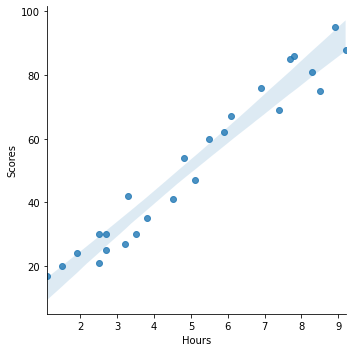

In [6]:
sns.lmplot(x='Hours', y='Scores', data = data)

### The correlation matrix and the scatter plot shows the variables are linearly correlated.

## Preparing the data.

In [7]:
x = data.drop('Scores', axis = 1)
y = data['Scores']

x_train, x_test, y_train, y_test = tts(x, y, test_size = .1, random_state = 42)

## Building the model.

In [8]:
lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression()

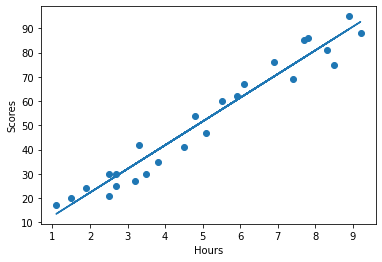

(9.783854386112745, 2.6912867616078344)

In [9]:
plt.scatter(data['Hours'], data['Scores'])
plt.plot(data['Hours'], lr.predict(data['Hours'].values.reshape(-1, 1)))
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

lr.coef_[0], lr.intercept_  # Slope and y-intercept of the best fit line.

### Checking for homoscedasticity.

In [10]:
residual = y_train-lr.predict(x_train)

#residual

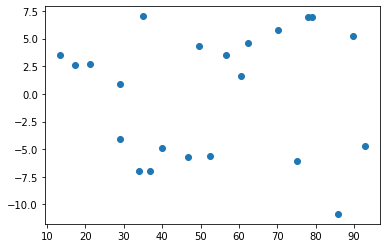

In [11]:
plt.scatter(lr.predict(x_train), residual)
plt.show()

### There is no pattern in the plot. So the data is homoscedastic.

## Checking for normality of residuals.

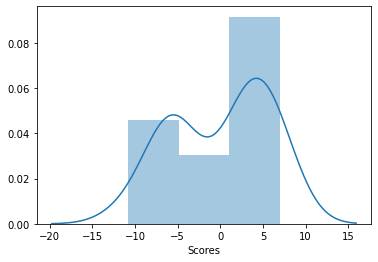

In [12]:
sns.distplot(residual)

### The distribution of residuals is fairly uniform.

## Evaluating the model on test data.

In [13]:
y_pred = lr.predict(x_test)

print(y_pred, list(y_test))

[83.89727817 27.15092273 27.15092273] [81, 30, 21]


## Evaluating the model using evaluation metrics. 
## Mean Absolute Error and Root Mean Squared Error.

In [14]:
MAE = MAE(data['Scores'].values.reshape(-1, 1), lr.predict(data['Hours'].values.reshape(-1, 1)))
MSE = MSE(data['Scores'].values.reshape(-1, 1), lr.predict(data['Hours'].values.reshape(-1, 1)))

print('Mean Absolute Error :-', MAE)
print('Root Mean Squared Error :-', math.sqrt(MSE))

Mean Absolute Error :- 4.94534760259543
Root Mean Squared Error :- 5.380019877372515


## The model is ready to make predictions on unseen data.

### X=9.25 hrs/day

In [15]:
predict = [[9.25]]

prediction = lr.predict(predict)

print("Estimated score for 9.25 hrs/day studytime =", prediction[0])

Esimated score for 9.25 hrs/day studytime = 93.19193983315074
